<a href="https://colab.research.google.com/github/maleal2/Neural-Networks-and-Deep-Learning-AAI-511-01-/blob/main/Assignment_2_1_MariaLeal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- **Name**: Maria Carolina Leal Cardenas
- **Date**: 07/06/2024

# Importing dataset to Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Basic Libraries

In [ ]:
# Importing Basic Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Importing Additional Libraries

In [ ]:
# Data Preparation
from sklearn.preprocessing import LabelEncoder  # Converting categorical variables into numerical data
from sklearn.preprocessing import StandardScaler  # Scaling the data

# Data Splitting and Cross-Validation
from sklearn.model_selection import train_test_split  # Splitting the data into training and testing sets

# Importing metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

In [ ]:
# Importing Machine Learning and Deep Learning Libraries.
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD
from sklearn.ensemble import RandomForestClassifier

# Importing Data

In [ ]:
ad_data= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AAI-510.Deep-Learning/Module2/M2-Advertising Dataset.csv')

In [ ]:
# Checking ad_data distribution.
print(ad_data.shape)
ad_data.head()

(1000, 10)


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


# Data Analysis

In [ ]:
# Checking the total number of entries in the "Clicked on Ad" column.
ad_data['Clicked on Ad'].value_counts()

Clicked on Ad
0    500
1    500
Name: count, dtype: int64

From the above result, we can see that we have an even distribution of the target column = Clicked on Ad.

In [ ]:

# Calculating the number of missing values and their percentage
nann_values= ad_data.isnull().sum()
nann_values_percent= 100*ad_data.isnull().sum()/len(ad_data)

# Combining the two series into a DataFrame
nann_values_table= pd.concat([nann_values,nann_values_percent],axis=1)

# Renaming the columns
nann_values_table_ren_colum= nann_values_table.rename(columns={0:'Missing Values' , 1:'% of Total Values'})

# Filtering out columns with 0% missing values and sort by percentage of missing values.
nann_values_table_ren_colum=nann_values_table_ren_colum[nann_values_table_ren_colum.iloc[:,1]!=0].sort_values('% of Total Values',ascending =False).round(1)

# Adjusting Pandas to display settings
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Auto-detect the width of the display
pd.set_option('display.max_colwidth', None)  # Show full column content

# Displaying  the table
print(nann_values_table_ren_colum)


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []


From the above result, we can see that there are not missing entries per variable.

In [ ]:
# Verifying the number of counts values per type.
ad_data.dtypes.value_counts()

object     4
float64    3
int64      3
Name: count, dtype: int64

Among the provided variables in the ad_data. There are a total of 4 categorical, 3 integers, and 3 decimals.

In [ ]:
ad_data.select_dtypes('object').nunique() # Checking the number of unique values for categorical variables.

Ad Topic Line    1000
City              969
Country           237
Timestamp        1000
dtype: int64

In [ ]:
# Renaming and change data types for "Timestamp" dataset.
ad_data.rename(columns={'Timestamp':'Date'},inplace=True)
ad_data['Date']= pd.to_datetime(ad_data['Date'])

In [ ]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Date,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [ ]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Ad Topic Line             1000 non-null   object        
 5   City                      1000 non-null   object        
 6   Male                      1000 non-null   int64         
 7   Country                   1000 non-null   object        
 8   Date                      1000 non-null   datetime64[ns]
 9   Clicked on Ad             1000 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 78.2+ KB


Verifying that the new column "Date" has the right format in datetime.

In [ ]:
# Setting 'Date' as index.
ad_data.set_index('Date',inplace=True)
# Sorting the Index.
ad_data.sort_index(inplace=True)
# Renaming the Index.
ad_data.index.name= 'Date_Index'
# Displaying the first few rows.
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Clicked on Ad
Date_Index,,,,,,,,,
2016-01-01 02:52:10,80.67,34,58909.36,239.76,Seamless impactful info-mediaries,Jamesville,0,Portugal,0
2016-01-01 03:35:35,68.01,25,68357.96,188.32,Ameliorated actuating workforce,Kaylashire,1,Afghanistan,0
2016-01-01 05:31:22,80.94,36,60803.00,239.94,Self-enabling local strategy,North Tiffany,0,Bermuda,0
2016-01-01 08:27:06,78.77,28,63497.62,211.83,Public-key intangible Graphical User Interface,Gomezport,0,Guam,0
2016-01-01 15:14:24,36.56,29,42838.29,195.89,Team-oriented bi-directional secured line,West Ryan,0,Uganda,1


In [ ]:
print(ad_data.shape)


(1000, 9)


## Bivariate Analysis

### Boxplots.

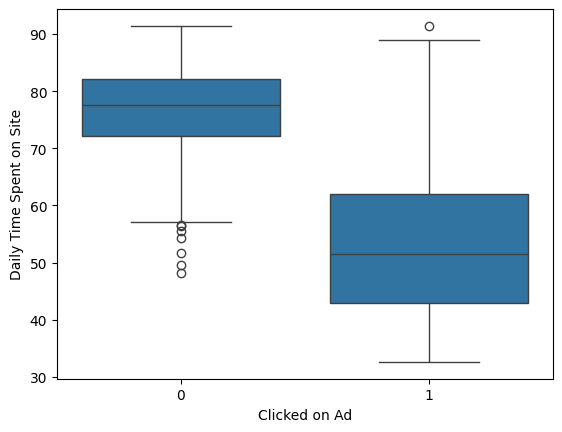

In [ ]:
# Checking the "Daily Time spent on site" against "Clicked on Ad"
sns.boxplot(x='Clicked on Ad',y='Daily Time Spent on Site',data=ad_data)
plt.show()


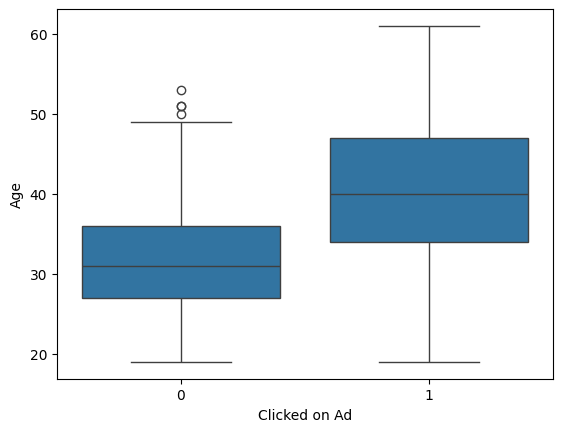

In [ ]:
# Checking the "Age" against "Clicked on Ad"
sns.boxplot(x='Clicked on Ad',y='Age',data=ad_data)
plt.show()

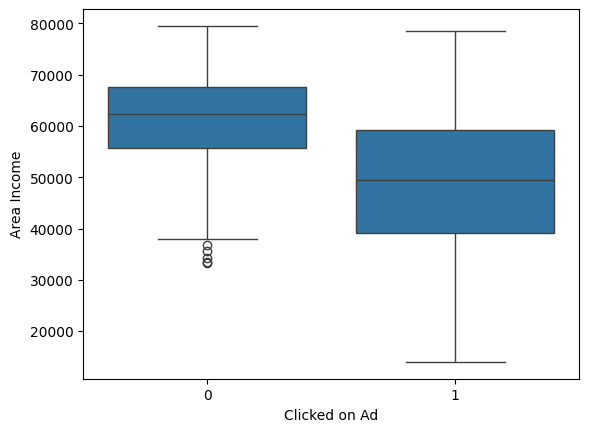

In [ ]:
# Checking the "Area Income" against "Clicked on Ad"
sns.boxplot(x='Clicked on Ad',y='Area Income',data=ad_data)
plt.show()

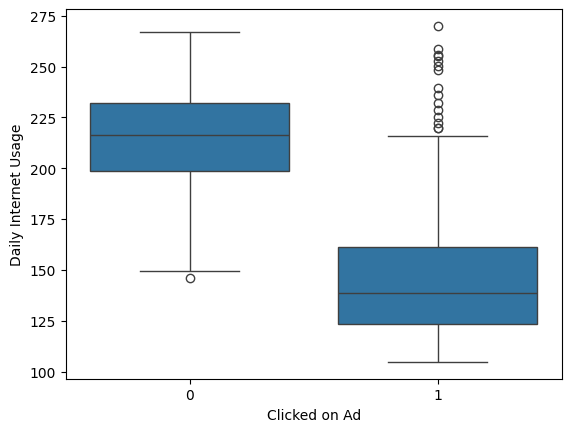

In [ ]:
# Checking the "Daily Internet Usage" against "Clicked on Ad"
sns.boxplot(x='Clicked on Ad',y='Daily Internet Usage',data=ad_data)
plt.show()

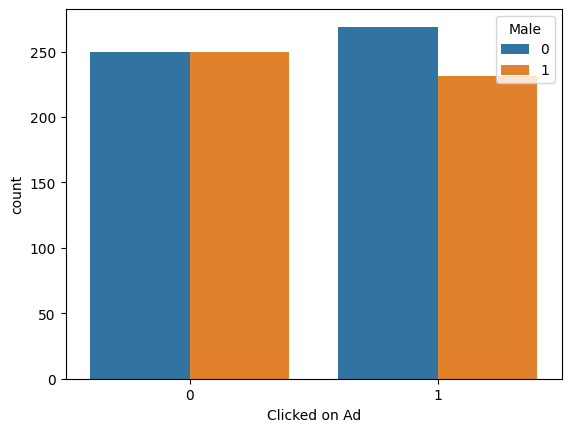

In [ ]:
# Checking "Gender" (Male) column against "Clicked on Ad"
sns.countplot(x='Clicked on Ad',hue='Male',data=ad_data)
plt.show()

### PairPlots

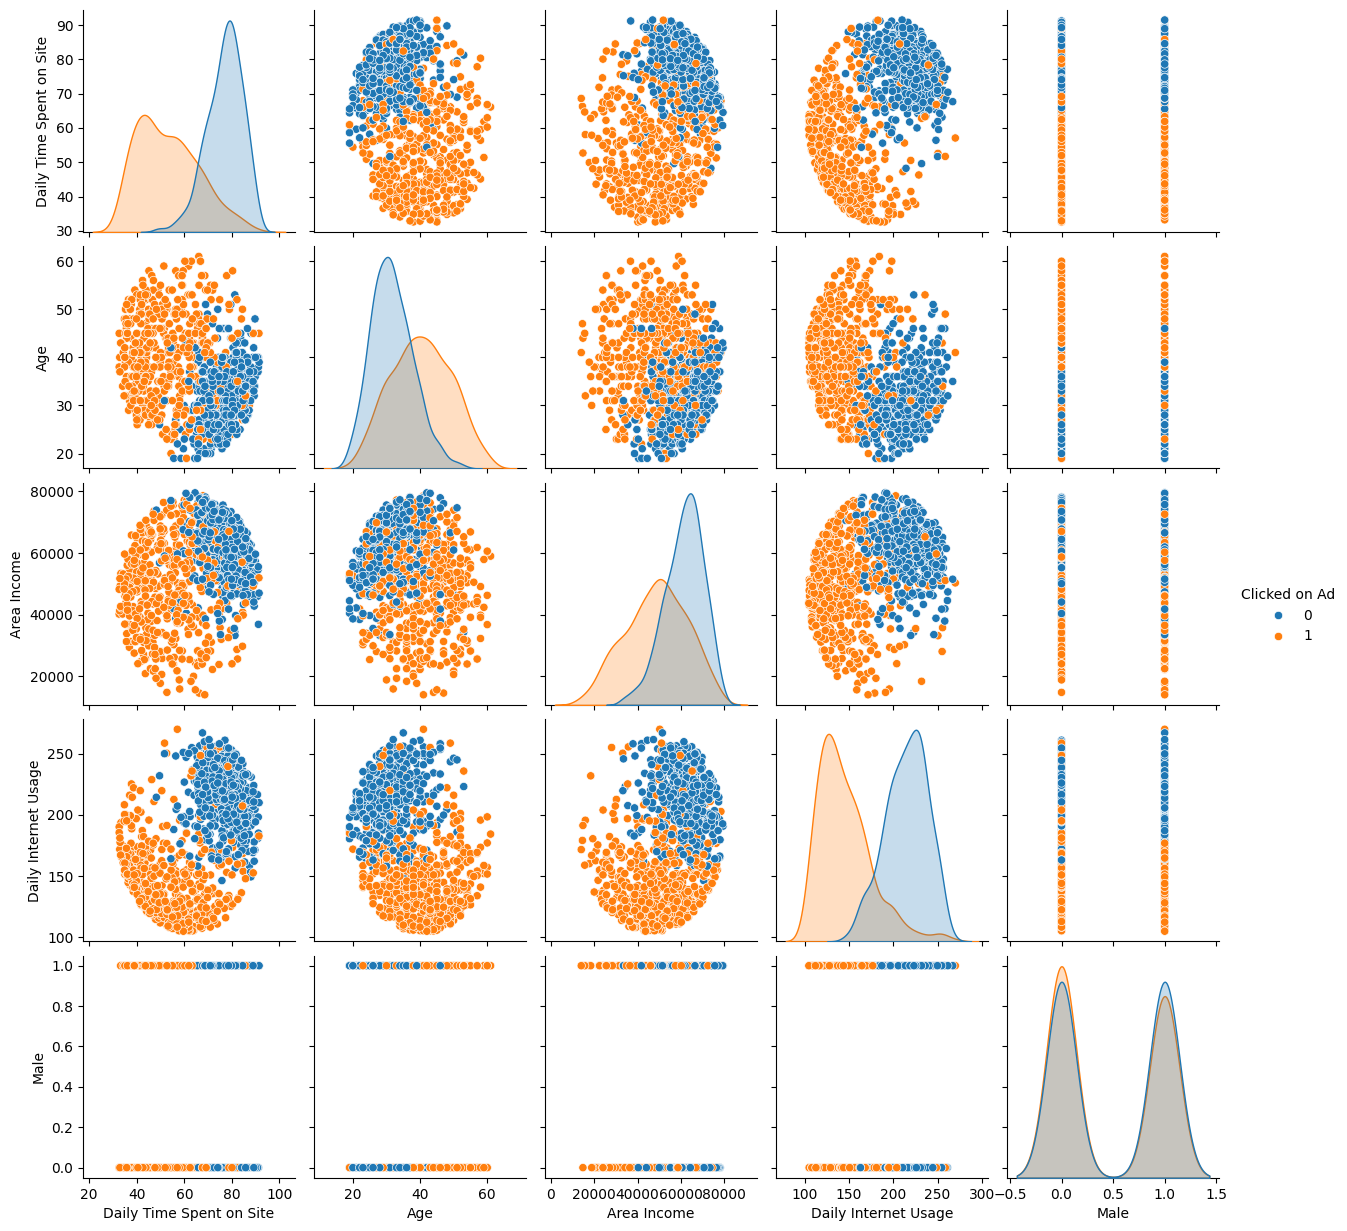

In [ ]:
sns.pairplot(ad_data, hue='Clicked on Ad', vars=['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male'])
plt.show()


From the graphs listed above, we can observe some interesting results, such as:

- The more time a person spends on the website, the more likely they are not to click on ads. This might suggest that the person is actually reading through the content of the website rather than clicking on an ad out of a one-time issue.
- We can also see significant behavior based on the age of the users. For example, users aged 45 years and older tend not to click on ads. It would be interesting to know if the ads being advertised are of interest to mid-aged to elderly users.
- Area income also shows notable discoveries. For instance, the higher the person's income, the fewer instances of them clicking on certain ads. This suggests that the types of ads being displayed may be more appealing to lower-income users, possibly due to sales or discounts being advertised.
- Daily internet usage shows a median of 220 minutes for users who tend not to click on ads and a median of 120 minutes for those who do click on ads. There are some outliers in the "clicking on an ad" group, which might be influenced by other variables that we haven't analyzed yet

### Correlation Heatmap

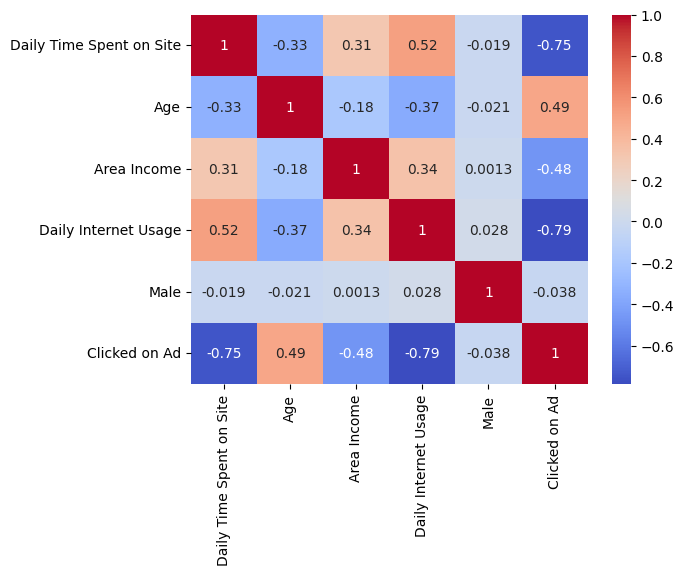

In [ ]:
numerical_df= ad_data.select_dtypes(include=['int64','float64'])
corr_matrix= numerical_df.corr()
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm')
plt.show()

In [ ]:
corr_matrix= numerical_df.corr()['Clicked on Ad'].sort_values()
corr_matrix

Daily Internet Usage       -0.786539
Daily Time Spent on Site   -0.748117
Area Income                -0.476255
Male                       -0.038027
Age                         0.492531
Clicked on Ad               1.000000
Name: Clicked on Ad, dtype: float64

From the correlation results listed above, we can confirm what we observed from the previous graps:

- Daily Internet Usage: There is a strong negative correlation (-0.787) with "Clicked on Ad," indicating that higher internet usage is associated with a lower likelihood of clicking on ads. This might suggest that users who spend more time online are more accustomed to ignoring ads.

- Daily Time Spent on Site: Similarly, there is a strong negative correlation (-0.748) with "Clicked on Ad." This implies that users who spend more time on the website are less likely to click on ads, possibly because they are more engaged with the website's content.

- Area Income: There is a moderate negative correlation (-0.476) with "Clicked on Ad." This suggests that higher-income individuals are less likely to click on ads, perhaps because the ads are not targeted towards their interests or needs.

- Male: There is a very weak negative correlation (-0.038) with "Clicked on Ad," indicating that gender does not significantly impact whether a user clicks on ads.

- Age: There is a moderate positive correlation (0.493) with "Clicked on Ad." This suggests that older users are more likely to click on ads. It would be interesting to explore if the ads are more appealing to middle-aged to older users.

# Data pre-processing

In [ ]:
ad_data_2= ad_data.copy()
ad_data_3= ad_data.copy()

In [ ]:
# Converting categorical variables to numerical values using One-hot encoding.
ad_data_2 = pd.get_dummies(ad_data_2,columns=['City','Country','Ad Topic Line'])


In [ ]:
ad_data_2.head()

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  Male  \
Date_Index                                                                                    
2016-01-01 02:52:10                     80.67   34     58909.36                239.76     0   
2016-01-01 03:35:35                     68.01   25     68357.96                188.32     1   
2016-01-01 05:31:22                     80.94   36     60803.00                239.94     0   
2016-01-01 08:27:06                     78.77   28     63497.62                211.83     0   
2016-01-01 15:14:24                     36.56   29     42838.29                195.89     0   

                     Clicked on Ad  City_Adamsbury  City_Adamside  City_Adamsstad  City_Alanview  \
Date_Index                                                                                         
2016-01-01 02:52:10              0           False          False           False          False   
2016-01-01 03:35:35              0           False          False           False          False   
2016-01-01 05:31:22              0           False          False           False          False   
2016-01-01 08:27:06              0           False          False           False          False   
2016-01-01 15:14:24              1           False          False           False          False   

                     City_Alexanderfurt  City_Alexanderview  City_Alexandrafort  City_Alexisland  \
Date_Index                                                                                         
2016-01-01 02:52:10               False               False               False            False   
2016-01-01 03:35:35               False               False               False            False   
2016-01-01 05:31:22               False               False               False            False   
2016-01-01 08:27:06               False               False               False            False   
2016-01-01 15:14:24               False               False               False            False   

                     City_Aliciatown  City_Alvaradoport  City_Alvarezland  City_Amandafort  \
Date_Index                                                                                   
2016-01-01 02:52:10            False              False             False            False   
2016-01-01 03:35:35            False              False             False            False   
2016-01-01 05:31:22            False              False             False            False   
2016-01-01 08:27:06            False              False             False            False   
2016-01-01 15:14:24            False              False             False            False   

                     City_Amandahaven  City_Amandaland  City_Amyfurt  City_Amyhaven  \
Date_Index                                                                            
2016-01-01 02:52:10             False            False         False          False   
2016-01-01 03:35:35             False            False         False          False   
2016-01-01 05:31:22             False            False         False          False   
2016-01-01 08:27:06             False            False         False          False   
2016-01-01 15:14:24             False            False         False          False   

                     City_Andersonchester  City_Andersonfurt  City_Andersonton  \
Date_Index                                                                       
2016-01-01 02:52:10                 False              False             False   
2016-01-01 03:35:35                 False              False             False   
2016-01-01 05:31:22                 False              False             False   
2016-01-01 08:27:06                 False              False             False   
2016-01-01 15:14:24                 False              False             False   

                     City_Andrewborough  City_Andrewmouth  City_Angelhaven  City_Anthonyfurt  \
Date_Index   

In [ ]:
# Splitting Data into training and testing sets using 80:20 ration.
X = ad_data_2.drop('Clicked on Ad', axis=1)
y = ad_data_2['Clicked on Ad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("Printing shape of the training and testing sets:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Printing shape of the training and testing sets:
X_train shape: (800, 2211)
X_test shape: (200, 2211)
y_train shape: (800,)
y_test shape: (200,)


In [ ]:
# Scaling the features or variables using StandardScaler.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Defining Artifical Neural Network Model.

# Model_1

In [ ]:
def create_model():
    model_1 = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')  # Sigmoid for binary classification
    ])
    model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # Binary_crossentropy as loss function for binary classification.
    return model_1

In [ ]:
# Displaying the model
model_1 = create_model()

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                141568    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 143681 (561.25 KB)
Trainable params: 143681 (561.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Training the model.
history = model_1.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))

Epoch 1/10
25/25 [==============================] - 4s 16ms/step - loss: 0.7970 - accuracy: 0.5288 - val_loss: 0.6957 - val_accuracy: 0.5000
Epoch 2/10
25/25 [==============================] - 0s 4ms/step - loss: 0.6135 - accuracy: 0.6575 - val_loss: 0.6573 - val_accuracy: 0.5200
Epoch 3/10
25/25 [==============================] - 0s 4ms/step - loss: 0.4571 - accuracy: 0.7950 - val_loss: 0.6294 - val_accuracy: 0.5650
Epoch 4/10
25/25 [==============================] - 0s 4ms/step - loss: 0.3263 - accuracy: 0.8950 - val_loss: 0.6006 - val_accuracy: 0.5900
Epoch 5/10
25/25 [==============================] - 0s 4ms/step - loss: 0.2150 - accuracy: 0.9450 - val_loss: 0.5699 - val_accuracy: 0.6400
Epoch 6/10
25/25 [==============================] - 0s 4ms/step - loss: 0.1307 - accuracy: 0.9650 - val_loss: 0.5272 - val_accuracy: 0.7100
Epoch 7/10
25/25 [==============================] - 0s 4ms/step - loss: 0.0787 - accuracy: 0.9887 - val_loss: 0.5395 - val_accuracy: 0.7050
Epoch 8/10
25/25 [=

In [ ]:
# Predicting probabilities for each class
y_pred_probs = model_1.predict(X_test_scaled)

# Converting probabilities to class labels based on a threshold (e.g., 0.5 for binary classification)
y_pred = (y_pred_probs > 0.5).astype(int)

7/7 [==============================] - 0s 2ms/step


In [ ]:
# Evaluating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
test_confusion_matrix = confusion_matrix(y_test, y_pred)
test_class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC Score: {roc_auc:.2f}')
print("\nTest Confusion Matrix:")
print(test_confusion_matrix)

print("\nTest Classification Report:")
print(test_class_report)

Accuracy: 0.73
Precision: 0.98
Recall: 0.49
F1 Score: 0.65
ROC AUC Score: 0.74

Test Confusion Matrix:
[[98  1]
 [52 49]]

Test Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.99      0.79        99
           1       0.98      0.49      0.65       101

    accuracy                           0.73       200
   macro avg       0.82      0.74      0.72       200
weighted avg       0.82      0.73      0.72       200



**Interpretation**:

- Accuracy: the model correctly predicts whether a user will click on an ad 73% of the time, which is a regular to low performance.

- Precision: Out of all the predicted clicks, 98% are actually correct. This means the model is precise in predicting clicks.

- Recall: The model captures 49% of all actual clicks. It identifies a good portion of users who click on ads but misses half of them.

- F1 Score: The balance between precision and recall is 65%, indicating a regular to low model performance.

- ROC AUC Score: An ROC AUC of 74% shows that the model has a regular to low discriminatory power between positive and negative classes.

# Model 2: Adding EarlyStopping and Momentum using Stochastic Gradient Descent.

In [ ]:
model_2 = create_model()

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model_2.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])




In [ ]:
history = model_2.fit(X_train_scaled, y_train, epochs=10, batch_size=32,
                    validation_data=(X_test_scaled, y_test), callbacks=[early_stopping])

Epoch 1/10
25/25 [==============================] - 1s 10ms/step - loss: 0.7674 - accuracy: 0.5300 - val_loss: 0.6520 - val_accuracy: 0.6800
Epoch 2/10
25/25 [==============================] - 0s 4ms/step - loss: 0.4883 - accuracy: 0.7875 - val_loss: 0.5642 - val_accuracy: 0.8400
Epoch 3/10
25/25 [==============================] - 0s 4ms/step - loss: 0.3024 - accuracy: 0.8900 - val_loss: 0.4297 - val_accuracy: 0.8900
Epoch 4/10
25/25 [==============================] - 0s 4ms/step - loss: 0.1372 - accuracy: 0.9588 - val_loss: 0.3340 - val_accuracy: 0.9050
Epoch 5/10
25/25 [==============================] - 0s 4ms/step - loss: 0.0711 - accuracy: 0.9787 - val_loss: 0.2780 - val_accuracy: 0.9150
Epoch 6/10
25/25 [==============================] - 0s 5ms/step - loss: 0.0616 - accuracy: 0.9787 - val_loss: 0.2525 - val_accuracy: 0.9200
Epoch 7/10
25/25 [==============================] - 0s 4ms/step - loss: 0.0438 - accuracy: 0.9862 - val_loss: 0.2359 - val_accuracy: 0.9200
Epoch 8/10
25/25 [=

In [ ]:
# Predicting probabilities for each class
y_pred_probs = model_2.predict(X_test_scaled)

# Converting probabilities to class labels based on a threshold (e.g., 0.5 for binary classification)
y_pred = (y_pred_probs > 0.5).astype(int)

7/7 [==============================] - 0s 2ms/step


In [ ]:
# Evaluating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
test_confusion_matrix = confusion_matrix(y_test, y_pred)
test_class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC Score: {roc_auc:.2f}')
print("\nTest Confusion Matrix:")
print(test_confusion_matrix)

print("\nTest Classification Report:")
print(test_class_report)

Accuracy: 0.92
Precision: 0.95
Recall: 0.88
F1 Score: 0.91
ROC AUC Score: 0.92

Test Confusion Matrix:
[[94  5]
 [12 89]]

Test Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92        99
           1       0.95      0.88      0.91       101

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.91       200
weighted avg       0.92      0.92      0.91       200



**Interpretation**:

- Accuracy: Achieved an accuracy of 0.92 on the testing set, indicating that 92% of predictions were correct.
- Precision: Achieved a precision of 0.95, which is the proportion of true positive predictions among all positive predictions made.
- Recall: Achieved a recall of 0.88, which is the proportion of true positive predictions among all actual positive instances.
- F1 Score: Achieved an F1 score of 0.91, which is the harmonic mean of precision and recall, providing a balanced measure between the two.
- ROC AUC Score: Achieved a ROC AUC score of 0.92, indicating strong performance in distinguishing between positive and negative classes.

# Repeating the same experiment but with Random Forest Classifier.


In [ ]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Training the model
rf_classifier.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred_rf = rf_classifier.predict(X_test_scaled)

# Calculating the  evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)

# Printing the evaluation metrics
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1 Score: {f1_rf:.2f}")
print(f"ROC AUC Score: {roc_auc_rf:.2f}")

test_confusion_matrix = confusion_matrix(y_test, y_pred_rf)
test_class_report = classification_report(y_test, y_pred_rf)

print("\nTest Confusion Matrix:")
print(test_confusion_matrix)

print("\nTest Classification Report:")
print(test_class_report)



Accuracy: 0.96
Precision: 0.97
Recall: 0.96
F1 Score: 0.97
ROC AUC Score: 0.97

Test Confusion Matrix:
[[96  3]
 [ 4 97]]

Test Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        99
           1       0.97      0.96      0.97       101

    accuracy                           0.96       200
   macro avg       0.96      0.97      0.96       200
weighted avg       0.97      0.96      0.97       200



**Interpretation**:

- Accuracy: Achieved an accuracy of 0.96, indicating that 96% of predictions were correct.
- Precision: Achieved a precision of 0.97, which is the proportion of true positive predictions among all positive predictions made.
- Recall: Achieved a recall of 0.96, which is the proportion of true positive predictions among all actual positive instances.
- F1 Score: Achieved an F1 score of 0.97, which is the harmonic mean of precision and recall, providing a balanced measure between the two.
- ROC AUC Score: Achieved a ROC AUC score of 0.97, indicating strong performance in distinguishing between positive and negative classes.

In [ ]:
feature_importances = rf_classifier.feature_importances_

# Matching feature importances with column names
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Printing only the top 20 features
print(feature_importance_df.head(20))

                               Feature  Importance
3                 Daily Internet Usage    0.290467
0             Daily Time Spent on Site    0.209021
1                                  Age    0.087627
2                          Area Income    0.083441
4                                 Male    0.002983
999                    Country_Bolivia    0.002156
1090                   Country_Lebanon    0.001695
1094             Country_Liechtenstein    0.001692
1069                   Country_Hungary    0.001684
1190                    Country_Turkey    0.001674
1169              Country_South Africa    0.001494
1203                   Country_Vanuatu    0.001404
921             City_West Melissashire    0.001386
1025                   Country_Croatia    0.001383
982        Country_Antigua and Barbuda    0.001379
1192  Country_Turks and Caicos Islands    0.001362
1043                   Country_Finland    0.001356
176                   City_East Ronald    0.001338
131                     City_Du

**Conclusion on Predictive Factors**:

- Daily Internet Usage: The most influential factor is daily internet usage (Importance: 0.290). Users who spend more time online are more likely to engage with online ads, suggesting that active internet users are a key demographic for ad engagement.

- Daily Time Spent on Site: Following closely is the daily time spent on the website (Importance: 0.209). Users who spend more time on the site are also more likely to click on ads, indicating that engagement with site content plays a significant role in ad interaction.

- Age and Area Income: Age (Importance: 0.088) and area income (Importance: 0.083) are also important predictors. Older users and those with higher incomes show different behaviors towards online ads compared to younger or lower-income users, influencing their likelihood of clicking on ads.

- Gender (Male): Gender (Importance: 0.003) shows a minimal impact compared to other factors but still contributes to predicting ad engagement.

- Geographical Factors: Country and city features appear further down the list with minimal importance (Importance ranging from 0.001 to 0.002). While geographical location does influence ad-click behavior to some extent, daily internet usage and time spent on site have more significant predictive power.

**Practical Insights**

- Target Audience: Focus advertising efforts on users who spend more time online and on the site, as they are more likely to interact with ads.

- Content Strategy: Tailor ad content and timing based on demographic factors like age and income, considering their differing engagement patterns.

- Campaign Optimization: Allocate resources effectively by prioritizing platforms or campaigns that attract active internet users who spend significant time on the site.

# Conclusion

**Model 1**: Adam Optimizer (No Momentum)

- Accuracy: 0.73
- Precision: 0.98
- Recall: 0.49
- F1 Score: 0.65
- ROC AUC Score: 0.74

Analysis: Model 1 achieved good precision (98%) but lower recall (49%) and F1 score (65%). This indicates that while the model is good at correctly predicting positive instances (clicking on ads), it misses a significant number of actual positives.

**Model 2**: SGD Classifier with Momentum

- Accuracy: 0.92
- Precision: 0.95
- Recall: 0.88
- F1 Score: 0.91
- ROC AUC Score: 0.92

Analysis: Model 2 improved significantly over Model 1 with higher accuracy (92%), precision (95%), recall (88%), and F1 score (91%). The change of optimizer and addition of momentum with early stopping likely contributed to better convergence and performance metrics.

**Random Forest Classifier**: (Default Settings)

- Accuracy: 0.96
- Precision: 0.97
- Recall: 0.96
- F1 Score: 0.97
- ROC AUC Score: 0.97

Analysis: The Random Forest Classifier outperformed both neural network models with very high accuracy (96%), precision (97%), recall (96%), and F1 score (97%). This ensemble method proved highly effective for the classification task, likely due to its ability to handle complex interactions and non-linear relationships in the data.

**Conclusion**:

- Best Performing Model: The Random Forest Classifier with default settings demonstrated superior performance across all metrics, achieving the highest scores for accuracy, precision, recall, F1 score, and ROC AUC score.

- Neural Network Models: While Model 2 showed significant improvement over Model 1, both neural network models fell short of the Random Forest Classifier in terms of overall performance metrics.

**Considerations**:

The choice of model should consider not only performance metrics but also factors such as computational complexity, scalability, and interpretability. Neural networks offer flexibility but require careful tuning and training, whereas ensemble methods like Random Forests often provide robust performance with less parameter tuning.

However, we must consider that the dataset we worked with had only 1,000 entries, with 20% of this data used for testing the results. It is important to recall that Neural Network models perform better with larger datasets. Even though we obtained better results with the Machine Learning method (Random Forest Classifier), we must consider that the model may actually perform well in predicting data it has already seen but not in new data when working with a larger dataset due to potential overfitting.